Predicting the percentage of marks that a student is expected to score based
upon the number of hours he/she studies

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Importing the Dataset
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

print(dataset)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


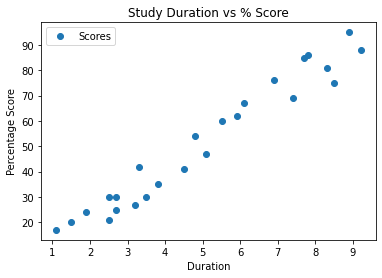

In [4]:
dataset.plot(x='Hours', y='Scores', style = 'o')
plt.title('Study Duration vs % Score')
plt.xlabel('Duration')
plt.ylabel('Percentage Score')
plt.show()

In [5]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,  1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

LinearRegression()

TRAINING the MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x,y)

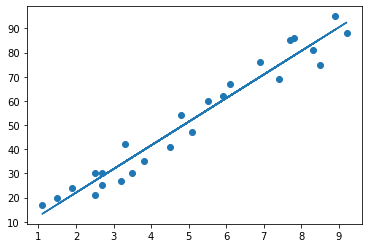

In [7]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

Predictions

In [ ]:
print(x_test)
y_pred = regressor.predict(x_test)

In [11]:
# Comparing Actual vs Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [12]:
print("Training Score: ", regressor.score(x_train, y_train))
print("Testing Score: ", regressor.score(x_test, y_test))

Training Score:  0.9512837351709387
Testing Score:  0.9491748734859172


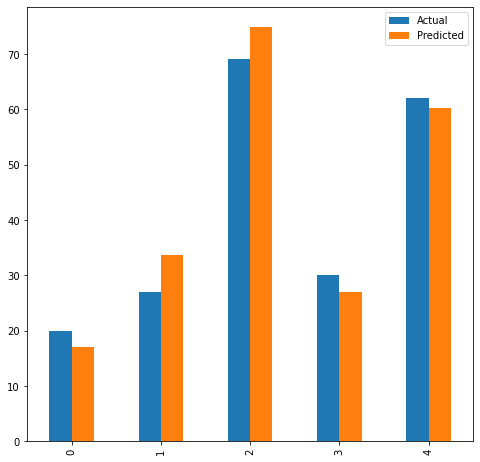

In [13]:
df.plot(kind = 'bar', figsize = (8,8))
plt.show()

In [14]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
newPred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(newPred[0]))


No of Hours = 9.25
Predicted Score = 92.9098547701573


#MODEL EVALUATION

In [16]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error:  4.071877793635603
Mean Squared Error:  20.13894812994016
Root Mean Squared Error:  4.487643939746129
